## ML-Based Fake Job Postings Detector Using NLP and Machine Learning

**Projec flow:**

1. Importing the libraries
2. Data Loading & Understanding the data
3. EDA ( Handling missing & few)
4. Text Preprocessing ( Cleaning the text through converting to lowercase, remove punctuations, stopwords and tokenize the words)
5. Feature Extraction or Text Representation (using TF-IDF ( convert text into numbers that ML models can understand ))
6. Train/Test split.
7. Model Training 
8. Model Evaluation 
9. Tested with new samples
 

In [35]:
!pip install numpy==2.2.3

   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   -- ------------------------------------- 0.8/12.6 MB 5.6 MB/s eta 0:00:03
   ------ --------------------------------- 2.1/12.6 MB 6.5 MB/s eta 0:00:02
   ----------- ---------------------------- 3.7/12.6 MB 6.4 MB/s eta 0:00:02
   -------------- ------------------------- 4.5/12.6 MB 6.2 MB/s eta 0:00:02
   ----------------- ---------------------- 5.5/12.6 MB 5.4 MB/s eta 0:00:02
   --------------------- ------------------ 6.8/12.6 MB 5.7 MB/s eta 0:00:02
   ------------------------ --------------- 7.9/12.6 MB 5.7 MB/s eta 0:00:01
   ----------------------------- ---------- 9.2/12.6 MB 5.7 MB/s eta 0:00:01
   -------------------------------- ------- 10.2/12.6 MB 5.7 MB/s eta 0:00:01
   ------------------------------------ --- 11.5/12.6 MB 5.7 MB/s eta 0:00:01
   ---------------------------------------  12.6/12.6 MB 5.7 MB/s eta 0:00:01
   ---------------------------------------- 12.6/12.6 MB 5.6 MB/s eta 0:00:00
  

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.2.3 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.3 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.3 which is incompatible.


In [47]:
!pip install pandas==2.2.3


   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.5 MB 4.2 MB/s eta 0:00:03
   ---- ----------------------------------- 1.3/11.5 MB 3.7 MB/s eta 0:00:03
   ------- -------------------------------- 2.1/11.5 MB 3.9 MB/s eta 0:00:03
   ---------- ----------------------------- 3.1/11.5 MB 4.1 MB/s eta 0:00:03
   --------------- ------------------------ 4.5/11.5 MB 4.6 MB/s eta 0:00:02
   -------------------- ------------------- 6.0/11.5 MB 5.1 MB/s eta 0:00:02
   -------------------------- ------------- 7.6/11.5 MB 5.4 MB/s eta 0:00:01
   ------------------------------ --------- 8.9/11.5 MB 5.5 MB/s eta 0:00:01
   ----------------------------------- ---- 10.2/11.5 MB 5.7 MB/s eta 0:00:01
   ---------------------------------------  11.3/11.5 MB 5.7 MB/s eta 0:00:01
   ---------------------------------------- 11.5/11.5 MB 5.6 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
   

In [61]:
pip install numpy==1.26.4


  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.3
    Uninstalling numpy-2.2.3:
      Successfully uninstalled numpy-2.2.3
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
shap 0.50.0 requires numpy>=2, but you have numpy 1.26.4 which is incompatible.


In [63]:
import numpy as np

In [80]:
import pandas as pd


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\Ajay\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\Ajay\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\Ajay\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "C:\Users\Ajay\anaconda3\Lib\site-packages

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



ImportError: numpy.core.multiarray failed to import

In [51]:
print(np.__version__)
print(shap.__version__)

2.0.2


NameError: name 'shap' is not defined

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\Ajay\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\Ajay\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\Ajay\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "C:\Users\Ajay\anaconda3\Lib\site-packages

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



ImportError: numpy.core.multiarray failed to import

In [ ]:
df=pd.read_csv("C:/Users/Ajay/Desktop/Python/Fake Job Detector/fake_job_postings.csv")

In [ ]:
df.head()

## Dataset contains the following columns

- **job_id**	:  Unique identifier for each job posting. 

- **title**	Job title (e.g., Marketing Intern). 

- **location**	Geographic location of the job. 

- **department**	Corporate department of the job (e.g., Sales, Engineering). 

- **salary_range**	Expected salary range; text values like $50k–$60k. 

- **company_profile**	Brief description about the company. 

- **description**	Detailed job description. 

- **requirements**	Skills/qualifications required. 

- **benefits**	Benefits offered by the employer. 

- **telecommuting**	Indicates whether the job allows remote work (work from home) — typically 1 if yes, 0 if no. 

- **has_company_logo**	Binary — whether the posting includes a company logo. 

- **has_questions**	Binary — whether the posting has applicant screening questions. 

- **employment_type**	Type of employment: Full-time, Part-time, Contract, etc. 

- **required_experience**	Experience required: Entry level, Mid-senior, Intern, etc. 

- **required_education**	Minimum education needed (e.g., Bachelor’s, Master’s). 

- **industry**	Sector the company belongs to (IT, Healthcare, Real Estate, etc.). 

- **function**	Functional role type (e.g., Engineering, Research, Sales). 
- **fraudulent**	Target variable: 1 for fake job, 0 for real job. 


In [ ]:
df['company_profile'][0]

## EDA

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
df.info()

In [ ]:
df.duplicated().sum()

In [ ]:
df.isnull().sum()

In [ ]:
((df.isnull().sum() / len(df)) *100).sort_values(ascending=False)

### observations :

* As per above, columns like job_id ,telecommuting ,has_questions,has_company_logo,title ,fraudulent   has no null values.
* columns like salary_range, department, required_education, benefits, required_experience, function, industry, employment_type, company_profile, requirements, location, description has null values
         
           
                   
     

In [ ]:
df.drop(['job_id','has_company_logo','has_questions','telecommuting', 'salary_range','department'], axis=1, inplace=True)

In [ ]:
df.fillna('', inplace=True)

In [ ]:
df.isnull().sum()

In [ ]:
df['fraudulent'].value_counts()

In [ ]:
len(df['fraudulent'])

In [ ]:
print('percentage of Real jobs with class 0 : ', (df['fraudulent'].value_counts()[0] / len(df['fraudulent'])) *100 )
print('percnetage of Fake jobs with class 1 : ', (df['fraudulent'].value_counts()[1] / len(df['fraudulent']) *100) )
sns.countplot(data=df, x='fraudulent', color='purple')
plt.title('Class counts')
plt.show()

In [ ]:
df.describe(include='object')

In [ ]:
df.head(2)

## >> Visualizing insights 

In [ ]:
df['required_experience'].value_counts()

In [ ]:
exp=dict(df['required_experience'].value_counts())
del exp['']

In [ ]:
exp

In [ ]:
plt.figure(figsize=(8,5))
sns.set_theme(style='whitegrid')
plt.bar(exp.keys(), exp.values(), color='purple')
plt.title("Number of Jobs with Required Experience ")
plt.xlabel("Required Experience")
plt.ylabel("Number of Jobs")
plt.xticks(rotation=15)

plt.show()


In [ ]:
df.sample(1)

In [ ]:
def split(location):
    l=location.split(',')
    return l[0]
df['country'] = df['location'].apply(split)

In [ ]:
df['country'].value_counts() 

In [ ]:
country=dict(df['country'].value_counts()[:11])
del country['']
country

In [ ]:
plt.figure(figsize=(8,5))
sns.set_theme(style='whitegrid')
plt.bar(country.keys(), country.values(), color='purple')
plt.title("Number of Jobs with Country wise ")
plt.xlabel("Country Names")
plt.ylabel("Number of Jobs")
plt.xticks(rotation=15)

plt.show()

In [ ]:
df['required_education'].value_counts()

In [ ]:
edu=dict(df['required_education'].value_counts()[:6])
del edu['']

In [ ]:
edu

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(edu.keys(), edu.values(), color='purple')
plt.title('Top 5 education Levels based on Jobs')
plt.xlabel('Education')
plt.ylabel('No of Jobs')
plt.xticks(rotation=20)
plt.show()

In [ ]:
df['employment_type'].value_counts()

In [ ]:
industry=dict(df['industry'].value_counts()[:11])
del industry['']
industry

In [ ]:
plt.figure(figsize=(8,4))
plt.bar(industry.keys(), industry.values(), color='purple')
plt.title('industry requirements')
plt.xlabel('industry type')
plt.ylabel('No of jobs')
plt.xticks(rotation=70)
plt.show()

In [ ]:
emp_type=dict(df['employment_type'].value_counts())
del emp_type['']
emp_type

In [ ]:
plt.figure(figsize=(8,4))
plt.bar(emp_type.keys(), emp_type.values(), color='purple')
plt.title('Employment type requirements')
plt.xlabel('Employment type')
plt.ylabel('No of jobs')
plt.xticks(rotation=15)
plt.show()

In [ ]:
df.sample(1)

In [ ]:
print('Top 10 Real Jobs: ')
print()
df[df['fraudulent']==0]['title'].value_counts()[:10]

In [ ]:
print('Top 10 Fake Jobs: ')
print()
df[df['fraudulent']==1]['title'].value_counts()[:10]

## >> Combine Text Features 

In [ ]:
df['text']= df['title']+' '+df['company_profile']+' '+df['description']+' '+df['description']+' '+df['description']

In [ ]:
df.drop(['title','location',	'company_profile',	'description',	'requirements',	'benefits',
         'employment_type',	'required_experience', 'required_education',	'industry',	'function','country'], axis=1, inplace=True)

In [ ]:
df.head()

## >> Wordcloud 

In [ ]:
pip install wordcloud matplotlib  

In [ ]:
from wordcloud import WordCloud, STOPWORDS  # wordcloud - quickly spotting the most common words visually

In [ ]:
fraudjobs =df[df['fraudulent']==1].text
realjobs= df[df['fraudulent']==0].text

In [ ]:
# WordCloud expects a single concatenated string, not a pandas Series:

fraud_text = " ".join(fraudjobs.astype(str).tolist())
real_text  = " ".join(realjobs.astype(str).tolist())

# ➡️ This combines all rows in each subset into a long string of words

In [ ]:
# Optional: add custom stopwords beyond the default
stopwords = set(STOPWORDS)
stopwords.update(["job","work","position","role","will"])  # example extras

In [ ]:
# Generate for real jobs
wc_real = WordCloud(
    width=800, height=400,
    background_color='white',
    stopwords=stopwords).generate(real_text)

plt.figure(figsize=(10,6))
plt.imshow(wc_real, interpolation='bilinear')
plt.title("Word Cloud — Real Job Postings")
plt.axis("off")
plt.show()

In [ ]:
wc_fraud = WordCloud(
    width=800, height=400,
    background_color='white',
    stopwords=stopwords).generate(fraud_text)

plt.figure(figsize=(10,6))
plt.imshow(wc_fraud, interpolation='bilinear')
plt.title("Word Cloud — Fake Job Postings")
plt.axis("off")
plt.show()

## Text Preprocessing

In [ ]:
import nltk
import re                         #re is Python’s built-in regular expression
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

In [ ]:
stop_words= set(stopwords.words('english'))
lemmatizer= WordNetLemmatizer()

In [ ]:
def preprocess_text(text):
    
    # 1. Lowercase & remove HTML
    text = BeautifulSoup(text, "html.parser").get_text()   # removing HTML tags, links
    text = text.lower()
    
    # 2. Remove URLs & non letters
    text = re.sub(r'http\S+|www\.\S+', ' ', text)
    text = re.sub(r'[^a-z\s]', ' ', text)
    
    # 3. Tokenize
    tokens = word_tokenize(text)
    
    # 4. Remove stopwords
    tokens = [w for w in tokens if w not in stop_words]
    
    # 5. Lemmatize
    tokens = [lemmatizer.lemmatize(w) for w in tokens]
    
    # 6. Rejoin
    return " ".join(tokens)

df['processed_text'] = df['text'].apply(preprocess_text)

In [ ]:
df['text'][0]

In [ ]:
df['processed_text'][0]

## Feature Extraction & Preparing Data for Modeling

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer(
    max_features=5000,     # limit to most informative 5000 features
    ngram_range=(1, 2)  )    # use unigrams + bigrams


In [ ]:
X = tfidf.fit_transform(df['processed_text'])

In [ ]:
y = df['fraudulent']

In [ ]:
# Get feature names (words)
feature_names = tfidf.get_feature_names_out()

# Convert first 5 rows to DataFrame
sample_df = pd.DataFrame(X[:5].toarray(), columns=feature_names)
sample_df.head()


## Train / Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
# stratify=y means class proportions in y (target) are preserved in both train and test sets.
# ➡ Stratified splitting ensures that the class balance of your dataset is preserved when you divide it into training and testing sets.

## Train ML Models

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Oversample
sm = SMOTE(random_state=42)
X_train_res, X_train_res = sm.fit_resample(X_train, y_train)

# Train model
model_logistic = LogisticRegression(max_iter=1000)
model_logistic.fit(X_train_res, y_train_res)

y_pred = model_logistic.predict(X_test)
print(classification_report(y_test, y_pred))


In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

print("Before SMOTE counts:")
print(y_train.value_counts())

print("\nAfter SMOTE counts:")
print(pd.Series(y_resampled).value_counts())


In [ ]:
X_train_res[0]

### training using class weights

## 1. LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

log_model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced') # automatically adjusts weights,Useful for imbalance data  # Helps models learn better on minority classes
                             

log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)
print()
print(classification_report(y_test, y_pred))

## 2. SVM -- SVC

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

svm_model = SVC(C=1.0, class_weight='balanced')   
#LinearSVC is usually faster and a better default choice,,TF-IDF vectors are high-dimensional and sparse, and LinearSVC scales well with that
svm_model.fit(X_train, y_train)

y_pred_svc = svm_model.predict(X_test)
acc = accuracy_score(y_test, y_pred_svc)
print("Accuracy:", acc)
print()
print(classification_report(y_test, y_pred_svc))

In [ ]:
from sklearn.svm import LinearSVC

linear_svm = LinearSVC(C=1.0, class_weight='balanced')   
#LinearSVC is usually faster and a better default choice,,TF-IDF vectors are high-dimensional and sparse, and LinearSVC scales well with that
linear_svm.fit(X_train, y_train)

y_pred = linear_svm.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)
print()
print(classification_report(y_test, y_pred))

## 3. XGBOOST

In [ ]:
pip install xgboost


In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=(len(y_train)-sum(y_train))/sum(y_train)  # handle imbalance, it scales the importance of the minority class during training
)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)
print()

print(classification_report(y_test, y_pred))


## 4. NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

acc = accuracy_score(y_test, y_pred_nb)
print("Accuracy:", acc)
print()

print(classification_report(y_test, y_pred_nb))



## 5. DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(class_weight='balanced')
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

acc = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", acc)
print()

print(classification_report(y_test, y_pred_dt))


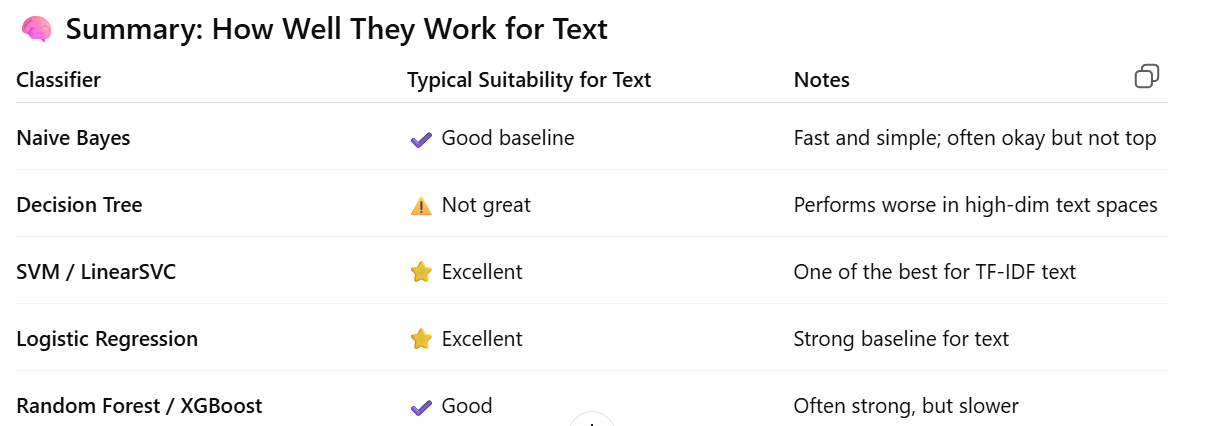

## Hyperparameters Tunning -- SVM

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],       # C- default regularization
    'kernel': ['linear','rbf'],
    'gamma': ['scale', 'auto']  # gamma only matters for non-linear kernels (like RBF),
}

grid = GridSearchCV(SVC(),
    param_grid=param_grid,
    scoring='f1',  # or 'accuracy', 'recall', etc.
    cv=5,
    verbose=True
)

grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best CV score:", grid.best_score_)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100]
}

grid = GridSearchCV(
    estimator=LinearSVC(class_weight='balanced', max_iter=2000),
    param_grid=param_grid,
    scoring='f1',  # or 'accuracy', 'recall', etc.
    cv=5
)

grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best CV score:", grid.best_score_)


## Model Evaluation

In [ ]:
models = {
    "Logistic Regression": log_model,
     "SVM": svm_model,
    "XGBoost": xgb_model,
    "Naive Bayes":nb_model,
     "Decision Tree": dt_model
}

In [ ]:
results_df

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

models = {
    "Logistic Regression": log_model,
    "SVM": svm_model,
    "XGBoost": xgb_model,
    "Naive Bayes": nb_model,
    "Decision Tree": dt_model
}

plt.figure(figsize=(15,10))

for i, (name, model) in enumerate(models.items(), start=1):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.subplot(3, 2, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.title(name)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
results_df[['Accuracy', 'Precision', 'Recall', 'F1']].plot(
    kind='bar', rot=45
)
plt.title("Comparison of Model Performance Metrics")
plt.ylabel("Score")
plt.ylim(0, 1)   # since these metrics range from 0 to 1
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


In [ ]:
cm = confusion_matrix(y_test, y_pred_svc)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix on SVM')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.svm import SVC
svm_prob = SVC(
    kernel='linear',         # use a linear boundary between classes
    probability=True,        # enable probability estimates
    class_weight='balanced'  # adjust weights for class imbalance
)
svm_prob.fit(X_train, y_train)

y_proba = svm_prob.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC (SVC with proba):", roc_auc)


## Saving my best performing Model

In [33]:
with open('svm.pkl', 'rb') as f:
    pickle.dump(svm, f)
    
with open('tfidf.pkl', 'rb') as f:
    pickle.dump(vectorizer, f)
    
with open('xtrain.pkl', 'rb') as f:
    pickle.dump(X_train_vec, f)

SyntaxError: expected ':' (756672181.py, line 1)

In [ ]:
import joblib

# Save the model
joblib.dump(svm, "svm.pkl")

# Later load it back
#loaded_model = joblib.load("best_model.pkl")


In [ ]:
import joblib

# Save the model
joblib.dump(svm, "svm.pkl")

# Checking my Model

In [ ]:
df['fraudulent'][345]

In [ ]:
df['text'][22]

In [ ]:
# 1. Sample texts to test
sample_texts = [
    "Senior Data Scientist role with competitive pay and benefits.",
    "Urgent! Earn $5000/week from home — no experience required.",
    "Apply now for a technical writer position in Bangalore.",
    "Work from home, no skills needed, click link to earn money fast."
]

# 2. Preprocess samples
processed_samples = [preprocess_text(t) for t in sample_texts]

# 3. TF-IDF transform
X_samples = tfidf.transform(processed_samples)

# 4. Predict
y_pred = svm.predict(X_samples)

# 5. Display results
for text, pred in zip(sample_texts, y_pred):
    label = "Fake Job" if pred == 1 else "Real Job"
    print("==============")
    print(f"Text: {text}")
    print(f"Prediction: {label}\n")


In [ ]:
# 1. Simple function to test one text
def predict_single(text):
    # if you did preprocessing before training, apply it here
    text_processed = preprocess_text(text)  

    # convert to TF-IDF vector
    X = tfidf.transform([text_processed])

    # predict
    pred = svm.predict(X)[0]   

    # print result
    if pred == 1:
        print("Prediction: Fake Job Posting")
    else:
        print("Prediction: Real Job Posting")

# 2. Example usage
sample = "This job offers free gifts and quick money with no interview."
predict_single(sample)

sample2 = "We are hiring a software developer with 3+ years experience."
predict_single(sample2)


In [26]:
#pip uninstall shap

^C
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install shap

In [37]:
import shap


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\Ajay\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\Ajay\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\Ajay\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "C:\Users\Ajay\anaconda3\Lib\site-packages

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



ImportError: numpy.core.multiarray failed to import

In [ ]:
import shap
explainer = shap.Explainer(svm, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)
